In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

from utils.data import get_dataloaders
from utils.train import train, test, get_device
from utils.vis import get_predictions_examples
from model.ViT import VisionTransformer

In [2]:
get_device()

device(type='mps')

In [8]:
train_loader, test_loader = get_dataloaders(train_loader_batch_size=64, test_loader_batch_size=64)
len(train_loader), len(test_loader)

(938, 157)

In [4]:
model = VisionTransformer(
    img_size=28,
    patch_size=4,  # 28x28 images divide the image into 4x4 patches
    in_channels=1,
    n_classes=10,  # 10 categories
    embed_dim=256,
    depth=4,  # number of transformer layers
    n_heads=8,  # number of attention heads
    mlp_ratio=4.0,  # hidden dim ratio
    dropout=0.1,  # dropout rate
)
model

VisionTransformer(
  (patch_embed): PatchEmbedding(
    (proj): Conv2d(1, 256, kernel_size=(4, 4), stride=(4, 4))
  )
  (transformer): TransformerEncoder(
    (layers): ModuleList(
      (0-3): 4 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=256, out_features=256, bias=True)
        )
        (linear1): Linear(in_features=256, out_features=1024, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
        (linear2): Linear(in_features=1024, out_features=256, bias=True)
        (norm1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.1, inplace=False)
        (dropout2): Dropout(p=0.1, inplace=False)
      )
    )
  )
  (norm): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
  (head): Linear(in_features=256, out_features=10, bias=True)
)

In [5]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=0.03)
criterion, optimizer

(CrossEntropyLoss(),
 Adam (
 Parameter Group 0
     amsgrad: False
     betas: (0.9, 0.999)
     capturable: False
     differentiable: False
     eps: 1e-08
     foreach: None
     fused: None
     lr: 0.0001
     maximize: False
     weight_decay: 0.03
 ))

In [6]:
train(model, train_loader, criterion, optimizer, epochs=5)

Epoch [1/5], Step [93/938], Loss: 1.9149
Epoch [1/5], Step [186/938], Loss: 1.4345
Epoch [1/5], Step [279/938], Loss: 1.2906
Epoch [1/5], Step [372/938], Loss: 1.2333
Epoch [1/5], Step [465/938], Loss: 1.1807
Epoch [1/5], Step [558/938], Loss: 1.1464
Epoch [1/5], Step [651/938], Loss: 1.1041
Epoch [1/5], Step [744/938], Loss: 1.0592
Epoch [1/5], Step [837/938], Loss: 1.0301
Epoch [1/5], Step [930/938], Loss: 0.9756
Epoch [2/5], Step [93/938], Loss: 0.9809
Epoch [2/5], Step [186/938], Loss: 0.9236
Epoch [2/5], Step [279/938], Loss: 0.9148
Epoch [2/5], Step [372/938], Loss: 0.9024
Epoch [2/5], Step [465/938], Loss: 0.8670
Epoch [2/5], Step [558/938], Loss: 0.8334
Epoch [2/5], Step [651/938], Loss: 0.8317
Epoch [2/5], Step [744/938], Loss: 0.8386
Epoch [2/5], Step [837/938], Loss: 0.8480
Epoch [2/5], Step [930/938], Loss: 0.8376
Epoch [3/5], Step [93/938], Loss: 0.8194
Epoch [3/5], Step [186/938], Loss: 0.8003
Epoch [3/5], Step [279/938], Loss: 0.7719
Epoch [3/5], Step [372/938], Loss: 0.

(VisionTransformer(
   (patch_embed): PatchEmbedding(
     (proj): Conv2d(1, 256, kernel_size=(4, 4), stride=(4, 4))
   )
   (transformer): TransformerEncoder(
     (layers): ModuleList(
       (0-3): 4 x TransformerEncoderLayer(
         (self_attn): MultiheadAttention(
           (out_proj): NonDynamicallyQuantizableLinear(in_features=256, out_features=256, bias=True)
         )
         (linear1): Linear(in_features=256, out_features=1024, bias=True)
         (dropout): Dropout(p=0.1, inplace=False)
         (linear2): Linear(in_features=1024, out_features=256, bias=True)
         (norm1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
         (norm2): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
         (dropout1): Dropout(p=0.1, inplace=False)
         (dropout2): Dropout(p=0.1, inplace=False)
       )
     )
   )
   (norm): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
   (head): Linear(in_features=256, out_features=10, bias=True)
 ),
 [1.234478467308890

In [9]:
test(model, test_loader, criterion)

Accuracy of the network on the 10000 test images: 77.26%
Test Loss: 0.6364


(77.26, 0.6363997542934053)

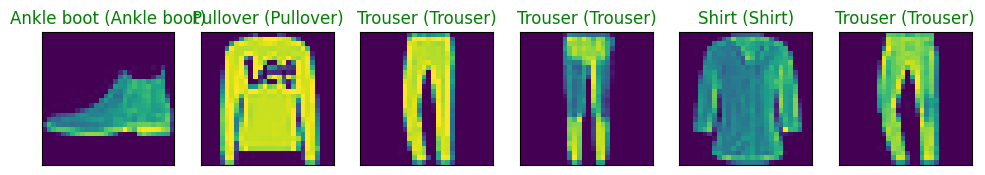

In [10]:
get_predictions_examples(model, test_loader)